##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

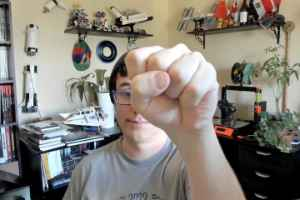

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

!wget -q -O photo.jpg https://storage.googleapis.com/mediapipe-demo/fist.jpg

img = cv2.imread("photo.jpg")
cv2_imshow(img)

In [ ]:
!wget -q -O rps.zip https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/rps_data_sample.zip
!unzip -qq rps.zip

In [64]:
import matplotlib.pyplot as plt
import os

NUM_EXAMPLES = 5
IMAGES_PATH = "data-new-1"

def is_not_ds_store(file_path):
    # Get the file name from the path
    file_name = os.path.basename(file_path)

    # Check if the file name is not equal to '.DS_Store'
    return file_name != '.DS_Store'

# Get the list of labels from the list of folder names.
labels = []
for i in os.listdir(IMAGES_PATH):
  if os.path.isdir(os.path.join(IMAGES_PATH, i)):
    labels.append(i)

# Show the images.
for label in labels:
  label_dir = os.path.join(IMAGES_PATH, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
    fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

/var/folders/8w/vsrqhh754fd9g7l47bgpx8y80000gn/T/ipykernel_69555/4182841780.py:31: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## Making a New Model



In [6]:
!pip install -q mediapipe-model-maker

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: colab 1.13.5 has a non-standard dependency specifier pytz>=2011n. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of colab or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: Could not install packages due to an OSError: Cannot move the non-empty directory '/usr/local/lib/python3.9/site-packages/PyYAML-5.4.1.dist-info/': Lacking write permission to '/usr/local/lib/python3.9/site-packages/PyYAML-5.4.1.dist-info/'.



In [58]:
# Import the necessary modules.
from mediapipe_model_maker import gesture_recognizer

In [72]:
# Load the rock-paper-scissor image archive.
data = gesture_recognizer.Dataset.from_folder(
    dirname=IMAGES_PATH,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)

# Split the archive into training, validation and test dataset.
train_data, rest_data = data.split(0.8)
print(train_data)
validation_data, test_data = rest_data.split(0.5)

Using existing files at /var/folders/8w/vsrqhh754fd9g7l47bgpx8y80000gn/T/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /var/folders/8w/vsrqhh754fd9g7l47bgpx8y80000gn/T/model_maker/gesture_recognizer/hand_landmark_full.tflite
INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryJXl7dX.jpeg


I0000 00:00:1701680456.822578       1 gl_context.cc:344] GL version: 2.1 (2.1 ATI-5.1.35), renderer: AMD Radeon Pro 555X OpenGL Engine
INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryJXl7dX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarya9ZfHm.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarya9ZfHm.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryZFhqlV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryZFhqlV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryC5yLSC.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryC5yLSC.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryvKwVsl.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryvKwVsl.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library2lF3NY.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library2lF3NY.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryUUMmU4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryUUMmU4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryYzNJLW.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryYzNJLW.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryhzirVQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryhzirVQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryeafqLx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryeafqLx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryGtTgBI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryGtTgBI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryrQMoWE.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryrQMoWE.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryWyfCpl.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryWyfCpl.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryeoJUx9.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryeoJUx9.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryysgrIe.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryysgrIe.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryshURbx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryshURbx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryAjg6uU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryAjg6uU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarygqXoTU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarygqXoTU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarymHvkpj.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarymHvkpj.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryssDVu5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryssDVu5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryKleGuy.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryKleGuy.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryJ2gxXP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryJ2gxXP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-librarysOZdIU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-librarysOZdIU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library53cC4r.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library53cC4r.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library0Ou0PI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library0Ou0PI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryeCUtV2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryeCUtV2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarybC7vbK.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarybC7vbK.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library2ABNYy.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library2ABNYy.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryUR0MCY.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryUR0MCY.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryK6wzyp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryK6wzyp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryy4URgl.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryy4URgl.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryfJkmYO.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryfJkmYO.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarySvfAbL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarySvfAbL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-library21krwj.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-library21krwj.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-library7PnCYM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-library7PnCYM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-library8jaOFb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-library8jaOFb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library7Pa0MA.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library7Pa0MA.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryqFA7OL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryqFA7OL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryuPnLtF.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryuPnLtF.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarydTkKIn.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarydTkKIn.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryi5xmsW.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryi5xmsW.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-library4mGp2S.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-library4mGp2S.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryqIln4n.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryqIln4n.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryJVGmpT.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryJVGmpT.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library8FHrGI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library8FHrGI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarylxlHgV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarylxlHgV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library0CMUfa.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library0CMUfa.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryCqclVM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryCqclVM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryq41kCu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryq41kCu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarywPZV7b.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarywPZV7b.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarysKFTX1.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarysKFTX1.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library9vaVR4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library9vaVR4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarymhWN7W.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarymhWN7W.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryYY32Bu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryYY32Bu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryMjvMfF.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryMjvMfF.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarywglp82.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarywglp82.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryFFgisR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryFFgisR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarylet6is.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarylet6is.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryErRkwy.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryErRkwy.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryebhq4H.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryebhq4H.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryInp7N3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryInp7N3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-librarycFfJ79.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-librarycFfJ79.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryfZKTYd.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryfZKTYd.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarybzjevI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarybzjevI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library6AA2Kf.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library6AA2Kf.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library1rN4DU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library1rN4DU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarytInZiB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarytInZiB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryPtLHkv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryPtLHkv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarycBY468.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarycBY468.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryK9cSk0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryK9cSk0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryoiSbtA.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryoiSbtA.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryXXFWFj.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryXXFWFj.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library5xpi14.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library5xpi14.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryd5FIyh.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryd5FIyh.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryQCx92F.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryQCx92F.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryHMVII1.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryHMVII1.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library8DHHck.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library8DHHck.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryFy69qI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryFy69qI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryY008ca.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryY008ca.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryiI5gCS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryiI5gCS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryw9z5i5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryw9z5i5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library4Ssthn.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library4Ssthn.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryy73N1R.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryy73N1R.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library1qDMh7.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library1qDMh7.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryR134wz.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryR134wz.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryFDMv0Q.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryFDMv0Q.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryHoliyM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryHoliyM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryyvAUET.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryyvAUET.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryqfNi9N.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryqfNi9N.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryeKpPd4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryeKpPd4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryyAUU5A.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryyAUU5A.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/9fe10d45-2f93-4c4d-924c-3f8dcb24b194.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/9fe10d45-2f93-4c4d-924c-3f8dcb24b194.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-library6roxSD.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-library6roxSD.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryy64UBg.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryy64UBg.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryspBCaB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryspBCaB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryxWQHtM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryxWQHtM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-library27Kvw5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-library27Kvw5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryqhmtPG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryqhmtPG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-librarywZFfkP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-librarywZFfkP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryeV1MGe.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryeV1MGe.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryer6JW0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryer6JW0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarywLr8fv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarywLr8fv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryaSUjSs.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryaSUjSs.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-librarym4ZRcH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-librarym4ZRcH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryryhSOs.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryryhSOs.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryG26jNg.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryG26jNg.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryX8dd0S.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryX8dd0S.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryPLaBrx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryPLaBrx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library6DeT4N.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library6DeT4N.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryxYQMaG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryxYQMaG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryGQtMAn.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryGQtMAn.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarynRAGPA.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarynRAGPA.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarycK3fI6.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarycK3fI6.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarybmRdgN.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarybmRdgN.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-library4BXRhP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-library4BXRhP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryW2F6ZW.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryW2F6ZW.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryODLx6j.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryODLx6j.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryhEkyxo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryhEkyxo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryrFnebL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryrFnebL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryZqMZXS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryZqMZXS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library42y2f7.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library42y2f7.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryKALGmR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryKALGmR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryY6PTP4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryY6PTP4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryBkRK5i.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryBkRK5i.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryJxMAXP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryJxMAXP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-library7neE3D.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-library7neE3D.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarysi4X5O.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarysi4X5O.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryCvdmQ8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryCvdmQ8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryC0JFuw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryC0JFuw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryZJ4b3D.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryZJ4b3D.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryXcICk8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryXcICk8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryKT0j2D.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryKT0j2D.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryumsjBX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryumsjBX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarySjM9kV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarySjM9kV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryjrD4q3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryjrD4q3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryIJSeBl.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryIJSeBl.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryi34mzo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryi34mzo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryKjd49p.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryKjd49p.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library3SkWG8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library3SkWG8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryp9vyS5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryp9vyS5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-library4EmldQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-library4EmldQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryRPFjJC.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryRPFjJC.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/media-librarye3nGD3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/media-librarye3nGD3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryyclDs8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryyclDs8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryzfK8Oe.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryzfK8Oe.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryhoKJqG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryhoKJqG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-library270dQo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-library270dQo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryFOn7BM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryFOn7BM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryvDK2Jd.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryvDK2Jd.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryJG54yS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryJG54yS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryWEMBQt.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryWEMBQt.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryoD1Cvt.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryoD1Cvt.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarylcVrvz.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarylcVrvz.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryIExEqc.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryIExEqc.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarybtYV9w.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarybtYV9w.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarySdfqOV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarySdfqOV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryH7erE8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryH7erE8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryot04tP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryot04tP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library0UF14g.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library0UF14g.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryxitGfM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryxitGfM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryiWGO9N.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryiWGO9N.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryifpJYM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryifpJYM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryUzj99h.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryUzj99h.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryAE6WNQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryAE6WNQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryUY1Djr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryUY1Djr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryFy7s6R.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryFy7s6R.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryxG4yjP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryxG4yjP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarymuZsKt.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarymuZsKt.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library82ZV1I.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library82ZV1I.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarywcTa8S.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarywcTa8S.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryPP63Mw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryPP63Mw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryztUZar.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryztUZar.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryUIrNsP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryUIrNsP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarytSS4sJ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarytSS4sJ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryg4zLht.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryg4zLht.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryI3X2E3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryI3X2E3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryrnq0YX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryrnq0YX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryDvZuTv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryDvZuTv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryKIdeqv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryKIdeqv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryItwrkx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryItwrkx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library06pil6.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library06pil6.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarysd5IKp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarysd5IKp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryXaJJbs.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryXaJJbs.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-library13qcGs.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-library13qcGs.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryz6QFYT.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryz6QFYT.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryyXUtp0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryyXUtp0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryftGM3u.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryftGM3u.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-librarydX1e1X.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-librarydX1e1X.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryLfzvTX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryLfzvTX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryEiiOWq.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryEiiOWq.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarywhyseR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarywhyseR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryjXIinV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryjXIinV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryAfUjfB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryAfUjfB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryc6P2J3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryc6P2J3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryhCrfXG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryhCrfXG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryiMIj4I.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryiMIj4I.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-library4EY0jU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-library4EY0jU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarybemQol.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarybemQol.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarycLTLHl.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarycLTLHl.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryI5eEP7.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryI5eEP7.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library46YlY5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library46YlY5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryWgMlwc.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryWgMlwc.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryKoCf9k.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryKoCf9k.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryhSy4ap.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryhSy4ap.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryAFeTML.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryAFeTML.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryQ2oQ85.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryQ2oQ85.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library6Rsvlx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library6Rsvlx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarySzV3J0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarySzV3J0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryhxv8oa.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryhxv8oa.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryNDb0Ke.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryNDb0Ke.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryKVp0Si.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryKVp0Si.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library2SIG14.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library2SIG14.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryC8CD71.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryC8CD71.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryzQlm2o.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryzQlm2o.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryMoXAwp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryMoXAwp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-librarylJdiNF.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-librarylJdiNF.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryxtUcFO.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryxtUcFO.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryiocDFD.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryiocDFD.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryLS9gNr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryLS9gNr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryY3XkLI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryY3XkLI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryWfGySS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryWfGySS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryl5kS5k.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryl5kS5k.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryxhy6Hg.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryxhy6Hg.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarySGqf9M.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarySGqf9M.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryd6HRMO.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryd6HRMO.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarymeZNES.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarymeZNES.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library0w1mht.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library0w1mht.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library0p2Tj6.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library0p2Tj6.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryjOVnPp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryjOVnPp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryxhCQmf.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryxhCQmf.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library7uLrIR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library7uLrIR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryqJDHu8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryqJDHu8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryJbLqtu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryJbLqtu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryCiOhuL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryCiOhuL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryptDYdd.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryptDYdd.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryCpXat2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryCpXat2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-library3bXKBL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-library3bXKBL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryNFsWvv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryNFsWvv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryUyyrIc.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryUyyrIc.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryxQl5ml.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryxQl5ml.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryLDbmdH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryLDbmdH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryzPN8vr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryzPN8vr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryfEY7j0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryfEY7j0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryY2Fdci.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryY2Fdci.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryyHr6kn.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryyHr6kn.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/c57ebf70-2d87-43c2-b05d-635c6b01c13c.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/c57ebf70-2d87-43c2-b05d-635c6b01c13c.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryhc7c8I.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryhc7c8I.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryZTj9xB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryZTj9xB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryiyJxuO.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryiyJxuO.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryfgtcA9.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryfgtcA9.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryMJ0k4o.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryMJ0k4o.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarybtr9kl.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarybtr9kl.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryQHftR4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryQHftR4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-library8nQWib.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-library8nQWib.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryfTHerS.png


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryfTHerS.png


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library64aVOu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library64aVOu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryku6VDG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryku6VDG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryqabouk.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryqabouk.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryYF8GoQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryYF8GoQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryZHfsPp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryZHfsPp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library6YqQ6f.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library6YqQ6f.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryR7Gtv2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryR7Gtv2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryVbzzcc.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryVbzzcc.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarydjlGBf.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarydjlGBf.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryKle6EG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryKle6EG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library71Qkjm.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library71Qkjm.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarycYdluX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarycYdluX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryOCmAlZ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryOCmAlZ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarySTH4Xe.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarySTH4Xe.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library6MdhE1.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library6MdhE1.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/d508ca7f-bb0c-4e16-9bf1-092489bb35f3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/d508ca7f-bb0c-4e16-9bf1-092489bb35f3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarySqBDft.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarySqBDft.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryIU6ENV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryIU6ENV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryxfRdMG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryxfRdMG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryTd0Xi5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryTd0Xi5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryIqXggB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryIqXggB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarygXctaV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarygXctaV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryqZEz9V.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryqZEz9V.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library5EMWxR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library5EMWxR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarygT726N.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarygT726N.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryRHjGrM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryRHjGrM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryxgVSJ2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryxgVSJ2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryvjewlR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryvjewlR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarydMZswH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarydMZswH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryNF1JCn.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryNF1JCn.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library86Sc7P.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library86Sc7P.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarytN76Db.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarytN76Db.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-library4C55KI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-library4C55KI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library7NnzzA.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library7NnzzA.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryBzS0XQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryBzS0XQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryw1HTnM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryw1HTnM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryOrVexy.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryOrVexy.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryOnSFCH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryOnSFCH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryuFxvCf.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryuFxvCf.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryMWyM6s.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryMWyM6s.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryYic0eo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryYic0eo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryyQmDlE.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryyQmDlE.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryr1RNRl.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryr1RNRl.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/8e0acbb1-e282-402f-bc1b-6407cf079a77.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/8e0acbb1-e282-402f-bc1b-6407cf079a77.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryfhVMiS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryfhVMiS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryhWycxG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryhWycxG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryYTTpXD.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryYTTpXD.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryTZhDRA.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryTZhDRA.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryv6do6R.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryv6do6R.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryU9FDoX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryU9FDoX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryMZ6v4Y.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryMZ6v4Y.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryXdUm3y.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryXdUm3y.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryx2YUUS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryx2YUUS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryIQivHm.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryIQivHm.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryKMO0lI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryKMO0lI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryQjBxw1.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryQjBxw1.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryJ4j2HN.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryJ4j2HN.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library2g30ws.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library2g30ws.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarygvZDdN.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarygvZDdN.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryA4Jucr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryA4Jucr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/1729.jpg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/1729.jpg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryKxQwJ1.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryKxQwJ1.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library0a35Yz.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library0a35Yz.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryWVl3Fs.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryWVl3Fs.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryVHWYr4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryVHWYr4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-librarymISIm3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-librarymISIm3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryHchWRb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryHchWRb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library52vW8R.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library52vW8R.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarynidt75.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarynidt75.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryYQL1dI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryYQL1dI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarymVXlGV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarymVXlGV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryYBLlfG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryYBLlfG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryBNiIe4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryBNiIe4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryuCzZ6W.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryuCzZ6W.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryAGMilr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryAGMilr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryxEB2dZ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryxEB2dZ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryN7s0wL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryN7s0wL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryuVx2Uo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryuVx2Uo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryuoAfwd.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryuoAfwd.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library65GuDj.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library65GuDj.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryV23CZv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryV23CZv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryCIydjw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryCIydjw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarymHZ5lR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarymHZ5lR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryq7qHY5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryq7qHY5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library7R6bvb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library7R6bvb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryK5BoEq.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryK5BoEq.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryYqQgAE.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryYqQgAE.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryA7JGMV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryA7JGMV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryd3HcVr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryd3HcVr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library0iVEQu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library0iVEQu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryseDG7t.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryseDG7t.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarykuyVGj.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarykuyVGj.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library8lke7n.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library8lke7n.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryY1PidH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryY1PidH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarye6pgtq.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarye6pgtq.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryOXRRfE.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryOXRRfE.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryPwaZ1Q.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryPwaZ1Q.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-library2mhlET.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-library2mhlET.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library2JTgwt.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library2JTgwt.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library472tOo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library472tOo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library4RdnG3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library4RdnG3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library4fiHlv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library4fiHlv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarywRFsED.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarywRFsED.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryEbfWq8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryEbfWq8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarycMcDXG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarycMcDXG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library6vPGlx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library6vPGlx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-library2Pm8Tg.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-library2Pm8Tg.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryfWt5Ej.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryfWt5Ej.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryIInmj7.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryIInmj7.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryAfscjF.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryAfscjF.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryOEtkxa.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryOEtkxa.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarytM4Ofc.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarytM4Ofc.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryZ5NBn3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryZ5NBn3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryhuIbDd.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryhuIbDd.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library1dRIOL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library1dRIOL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library85OlzO.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library85OlzO.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryh9yQ6u.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryh9yQ6u.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-librarywEiCvw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-librarywEiCvw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryQg3Fke.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryQg3Fke.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryFhGTaB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryFhGTaB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryDt7Ez8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryDt7Ez8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryzocHR7.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryzocHR7.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryYkYVWk.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryYkYVWk.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryFcWBqQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryFcWBqQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryFQic2r.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryFQic2r.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryg1sxhs.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryg1sxhs.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library2M6fdz.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library2M6fdz.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-library20F6Ai.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-library20F6Ai.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarycKYsYP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarycKYsYP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryoENB5B.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryoENB5B.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarymwVhZr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarymwVhZr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryisXDbg.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryisXDbg.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryQ3Tptz.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryQ3Tptz.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryMyuq9u.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryMyuq9u.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarynXbYOX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarynXbYOX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryEDmqLw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryEDmqLw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryzo2M2e.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryzo2M2e.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-librarykwL3fx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-librarykwL3fx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryRPD96s.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryRPD96s.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryeYraFW.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryeYraFW.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryzkTHsW.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryzkTHsW.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryDb6RLn.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryDb6RLn.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarys4FZnu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarys4FZnu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryRje6nN.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryRje6nN.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library8mHShQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library8mHShQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library6ZAzKf.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library6ZAzKf.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryw2QZTa.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryw2QZTa.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryC7wN8B.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryC7wN8B.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarymuuoQy.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarymuuoQy.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library6MWYrK.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library6MWYrK.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryJO0taW.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryJO0taW.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-library8HD509.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-library8HD509.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryQX660f.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryQX660f.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarydMfggI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarydMfggI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library7YqLoP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library7YqLoP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-library4kf0l6.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-library4kf0l6.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryh8cX2f.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryh8cX2f.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-library2MjX9w.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-library2MjX9w.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarytM1wQk.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarytM1wQk.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarys4jedC.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarys4jedC.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryfAgQBV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryfAgQBV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarylxDyk9.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarylxDyk9.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library9XkbKj.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library9XkbKj.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarySXNicm.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarySXNicm.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryRRjXG5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryRRjXG5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryQ6mNWi.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryQ6mNWi.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-library7L6KSv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-library7L6KSv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library6f89vt.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library6f89vt.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryKhNjUG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryKhNjUG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryW5L0bl.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryW5L0bl.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarycwGpvz.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarycwGpvz.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryG52znR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryG52znR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryWpz7U1.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryWpz7U1.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryC20p6g.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryC20p6g.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryoWJH62.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryoWJH62.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryA6Vner.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryA6Vner.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryWKyjJE.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryWKyjJE.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library5IRNn0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library5IRNn0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryDBUFvI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryDBUFvI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryPAIr7I.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryPAIr7I.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryxoUw8M.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryxoUw8M.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryaLeEHk.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryaLeEHk.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryg4piOU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryg4piOU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarydH4sQN.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarydH4sQN.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library6H7XUH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library6H7XUH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryRfjP0T.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryRfjP0T.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryDkdDnQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryDkdDnQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryPcBZkH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryPcBZkH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryPF34Vq.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryPF34Vq.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryHjfgQp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryHjfgQp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryeHmL13.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryeHmL13.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryeQfHPq.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryeQfHPq.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryP0u4oX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryP0u4oX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryicJ2rp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryicJ2rp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryVa1I0C.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryVa1I0C.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarypvMdBD.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarypvMdBD.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryWJ4L9r.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryWJ4L9r.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarymmPySe.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarymmPySe.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryzFca1C.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryzFca1C.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryZlv2CR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryZlv2CR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library9u0eEe.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library9u0eEe.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryMZjgUE.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryMZjgUE.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryOIL0pw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryOIL0pw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarytJAf5C.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarytJAf5C.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarykkmlKM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarykkmlKM.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryF248Sg.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryF248Sg.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryqWVcTt.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryqWVcTt.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryTBEcFm.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryTBEcFm.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryz9Unpu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryz9Unpu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryWFiGKC.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryWFiGKC.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryGJdfHx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryGJdfHx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryaVXFHo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryaVXFHo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryCWVfec.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryCWVfec.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryM5v896.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryM5v896.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryafaxSJ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryafaxSJ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryGb5jy5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryGb5jy5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryiRMyBL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryiRMyBL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryAtQ37m.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryAtQ37m.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryQd6Q90.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryQd6Q90.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryozBQsp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryozBQsp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryEjfFHK.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryEjfFHK.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryh35BJv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryh35BJv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryOVD4Pv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryOVD4Pv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarypDmrgO.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarypDmrgO.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryKrQFt4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryKrQFt4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryReUW2u.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryReUW2u.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryHG6VqD.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryHG6VqD.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryy1rmsu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryy1rmsu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryWhKqHo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryWhKqHo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryDwD87a.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryDwD87a.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-library1CYmET.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-library1CYmET.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryRPKpaP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryRPKpaP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryJVPR1P.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryJVPR1P.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryPlh8cI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryPlh8cI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryY85abY.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryY85abY.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarycbQUEH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarycbQUEH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryZaD3xp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryZaD3xp.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-librarycVgwQf.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-librarycVgwQf.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryoO0M6s.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryoO0M6s.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library5fkxoF.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library5fkxoF.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarynlI8OJ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarynlI8OJ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryWbFO3m.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryWbFO3m.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryttSAj0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryttSAj0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryuhz3Zf.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryuhz3Zf.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarysKk0JU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarysKk0JU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryI3x6HY.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryI3x6HY.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryx5kcAI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryx5kcAI.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library2vXQJ4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library2vXQJ4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryk3SXuN.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryk3SXuN.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryk9xSVX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryk9xSVX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryzrDtdP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryzrDtdP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryjXkfCY.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryjXkfCY.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryqjBlsB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryqjBlsB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarygrFdt0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarygrFdt0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/c333c1b9-4b6a-4df5-9acc-2e754760b48a.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/c333c1b9-4b6a-4df5-9acc-2e754760b48a.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarysh8Ut9.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarysh8Ut9.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryM3h1XP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryM3h1XP.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarysIXcJL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarysIXcJL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryr8JIC8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryr8JIC8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/c53adfcf-85a7-44a5-b199-3a417ef57acf.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/c53adfcf-85a7-44a5-b199-3a417ef57acf.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryDYAn81.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryDYAn81.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarygjCw22.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarygjCw22.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library0KAYb1.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library0KAYb1.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryIHanIn.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryIHanIn.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library6DXErL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-library6DXErL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryQnr8Y2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryQnr8Y2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryxB6O78.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryxB6O78.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarycKJXwa.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarycKJXwa.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-library8nz1VK.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-library8nz1VK.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryjcpYmk.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryjcpYmk.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryyrHdb4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryyrHdb4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryna52ZR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryna52ZR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryk2mHgb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryk2mHgb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryV8k1qL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryV8k1qL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryBsm3rX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryBsm3rX.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryvaKHml.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryvaKHml.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryZVTHKH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryZVTHKH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library56rPze.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library56rPze.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryUp6kpg.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryUp6kpg.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library6BXADi.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library6BXADi.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarykgqeYj.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarykgqeYj.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryQJQjIm.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryQJQjIm.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarymQdeWJ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarymQdeWJ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryeFovG1.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryeFovG1.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryUCtER8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryUCtER8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library0Y3MKr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library0Y3MKr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library60vSXj.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library60vSXj.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryW51Lu9.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryW51Lu9.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarySghjmU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarySghjmU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryZSITIT.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryZSITIT.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryC9g13F.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryC9g13F.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryEQXCZi.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryEQXCZi.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library4ToGWU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library4ToGWU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library5DdUMs.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library5DdUMs.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library8sgRxb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library8sgRxb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarymOliMU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarymOliMU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-library9ylHo2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-library9ylHo2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryodvZEx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryodvZEx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarydH82qb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarydH82qb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library3VUxc2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library3VUxc2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarydlHUcb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarydlHUcb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryDE1n3B.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryDE1n3B.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarymTLA0U.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-librarymTLA0U.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryIQZSMV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryIQZSMV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library9QiZrt.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library9QiZrt.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-library0BIp5r.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-library0BIp5r.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarykj1vS9.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarykj1vS9.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryggx7CA.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryggx7CA.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryeRQQJq.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryeRQQJq.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryiqaPpv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryiqaPpv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarycINB2S.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarycINB2S.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryiZ4wpR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryiZ4wpR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryOlS1NC.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryOlS1NC.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/c8738ce7-119b-4671-a39f-e8454f85e0ba.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/None/c8738ce7-119b-4671-a39f-e8454f85e0ba.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryCM90u2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryCM90u2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryawqZW9.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryawqZW9.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryzwNC3X.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryzwNC3X.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryLdjR2C.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryLdjR2C.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-librarywwltp5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-librarywwltp5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryBIrL7j.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryBIrL7j.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library4ZIBX8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library4ZIBX8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryAfwJwJ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryAfwJwJ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryg7Inr8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryg7Inr8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library1Fzp3t.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library1Fzp3t.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryHELODw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryHELODw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryEMrmP5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryEMrmP5.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryc5btVh.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryc5btVh.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarygU7Zr0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-librarygU7Zr0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryeagoAT.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryeagoAT.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-library6oQHtO.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-library6oQHtO.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarycYCDrB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarycYCDrB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarymCpxch.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarymCpxch.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryjnzi4P.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryjnzi4P.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-librarybcQD6S.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-librarybcQD6S.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryNvBeyO.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryNvBeyO.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryrzg8Kw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryrzg8Kw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library4GxXLn.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-library4GxXLn.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryuRzasR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryuRzasR.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryMMh7vS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryMMh7vS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarybPlW3W.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-librarybPlW3W.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library4imEzD.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library4imEzD.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library0IY9fr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library0IY9fr.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-library5uU6Rq.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-library5uU6Rq.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryn1vWNk.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryn1vWNk.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryWaLNVy.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryWaLNVy.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryK3rYQK.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-libraryK3rYQK.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryeT8vv7.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryeT8vv7.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryKAyhFm.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryKAyhFm.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarytGNzGU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarytGNzGU.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryu2KQ4j.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryu2KQ4j.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library8KG91d.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library8KG91d.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarys5Qwuv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarys5Qwuv.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryTbKaKG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryTbKaKG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryccnO29.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryccnO29.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryc2TJdD.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryc2TJdD.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryZUD02i.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryZUD02i.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryW6U0Zw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryW6U0Zw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarya1oHbS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarya1oHbS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryswVf1u.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryswVf1u.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarySofKVd.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-librarySofKVd.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library6XWNft.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-library6XWNft.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarygBMM5d.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarygBMM5d.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library94gIAo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-library94gIAo.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarys98Tbb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-librarys98Tbb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryGOP6an.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryGOP6an.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryAn4opb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryAn4opb.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library0xp4SB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/29/media-library0xp4SB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryCTfzVD.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryCTfzVD.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library8X7AkS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-library8X7AkS.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarycdkez3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarycdkez3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryk6wGVx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryk6wGVx.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryLi8IhW.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryLi8IhW.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryxSNkF8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-libraryxSNkF8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryFbl9bH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryFbl9bH.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryTl5bAw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryTl5bAw.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryPCrpHk.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-libraryPCrpHk.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryoAzrrG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryoAzrrG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-librarye8nIF7.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/30/media-librarye8nIF7.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarycDzLeu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/45/media-librarycDzLeu.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryvMFLTV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryvMFLTV.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryRl2ogA.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryRl2ogA.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryngO2y2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-libraryngO2y2.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryLFjqHF.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryLFjqHF.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryoGthd3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryoGthd3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryvrgR0P.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryvrgR0P.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryGG1KNG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryGG1KNG.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryOMAOvL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryOMAOvL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library2Xae03.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library2Xae03.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryiTQlm6.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-libraryiTQlm6.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-library7tKj14.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-library7tKj14.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryJUQmu0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryJUQmu0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarynsQ3RJ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-librarynsQ3RJ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library1grOto.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-library1grOto.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarykZtNDB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/39/media-librarykZtNDB.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryaWdWD3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryaWdWD3.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryZOmy6Z.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryZOmy6Z.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarySrQMtQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/33/media-librarySrQMtQ.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryMk9pX0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/43/media-libraryMk9pX0.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryUxiPc4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/41/media-libraryUxiPc4.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryymK5sd.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/47/media-libraryymK5sd.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryOjE88Q.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/40/media-libraryOjE88Q.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarykA712X.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-librarykA712X.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryS0o60j.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/46/media-libraryS0o60j.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryezbEJL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/36/media-libraryezbEJL.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library0KoSKm.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-library0KoSKm.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryHd0bI8.jpeg


INFO:tensorflow:Loading image /Users/smander/projects/kk-projects/verification/data-new/38/media-libraryHd0bI8.jpeg


Using existing files at /var/folders/8w/vsrqhh754fd9g7l47bgpx8y80000gn/T/model_maker/gesture_recognizer/gesture_embedder
INFO:tensorflow:Load valid hands with size: 595, num_label: 13, labels: None,29,30,33,36,38,39,40,41,43,45,46,47.


INFO:tensorflow:Load valid hands with size: 595, num_label: 13, labels: None,29,30,33,36,38,39,40,41,43,45,46,47.


In [73]:
# Train the model
hparams = gesture_recognizer.HParams(export_dir="rock_paper_scissors_model")
options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer  [(None, 128)]             0         
 )                                                               
                                                                 
 batch_normalization_5 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 re_lu_5 (ReLU)              (None, 128)               0         
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 custom_gesture_recognizer_  (None, 13)                1677      
 out (Dense)                                                     
                                                           

INFO:tensorflow:Training the models...


Epoch 1/10
238/238 [==============================] - 3s 8ms/step - loss: 1.9929 - categorical_accuracy: 0.2416 - val_loss: 1.0446 - val_categorical_accuracy: 0.6102 - lr: 0.0010
Epoch 2/10
238/238 [==============================] - 1s 5ms/step - loss: 1.4064 - categorical_accuracy: 0.4349 - val_loss: 0.6888 - val_categorical_accuracy: 0.7119 - lr: 9.9000e-04
Epoch 3/10
238/238 [==============================] - 1s 5ms/step - loss: 1.1430 - categorical_accuracy: 0.5483 - val_loss: 0.5913 - val_categorical_accuracy: 0.7966 - lr: 9.8010e-04
Epoch 4/10
238/238 [==============================] - 1s 6ms/step - loss: 0.9628 - categorical_accuracy: 0.6408 - val_loss: 0.5493 - val_categorical_accuracy: 0.8305 - lr: 9.7030e-04
Epoch 5/10
238/238 [==============================] - 1s 6ms/step - loss: 0.8733 - categorical_accuracy: 0.6744 - val_loss: 0.5495 - val_categorical_accuracy: 0.8305 - lr: 9.6060e-04
Epoch 6/10
238/238 [==============================] - 1s 5ms/step - loss: 0.8370 - catego

In [74]:
loss, acc = model.evaluate(test_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

60/60 [==============================] - 1s 3ms/step - loss: 0.3116 - categorical_accuracy: 0.8833
Test loss:0.31157028675079346, Test accuracy:0.8833333253860474


In [75]:
# Export the model bundle.
model.export_model()

# Rename the file to be more descriptive.
!mv rock_paper_scissors_model/gesture_recognizer.task rock_paper_scissors.task

Using existing files at /var/folders/8w/vsrqhh754fd9g7l47bgpx8y80000gn/T/model_maker/gesture_recognizer/gesture_embedder.tflite
Using existing files at /var/folders/8w/vsrqhh754fd9g7l47bgpx8y80000gn/T/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /var/folders/8w/vsrqhh754fd9g7l47bgpx8y80000gn/T/model_maker/gesture_recognizer/hand_landmark_full.tflite
Using existing files at /var/folders/8w/vsrqhh754fd9g7l47bgpx8y80000gn/T/model_maker/gesture_recognizer/canned_gesture_classifier.tflite
INFO:tensorflow:Assets written to: /var/folders/8w/vsrqhh754fd9g7l47bgpx8y80000gn/T/tmpj1xsjyzb/saved_model/assets


INFO:tensorflow:Assets written to: /var/folders/8w/vsrqhh754fd9g7l47bgpx8y80000gn/T/tmpj1xsjyzb/saved_model/assets
2023-12-04 11:05:50.199904: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-12-04 11:05:50.200445: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-12-04 11:05:50.204668: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/8w/vsrqhh754fd9g7l47bgpx8y80000gn/T/tmpj1xsjyzb/saved_model
2023-12-04 11:05:50.206552: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-12-04 11:05:50.206577: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/8w/vsrqhh754fd9g7l47bgpx8y80000gn/T/tmpj1xsjyzb/saved_model
2023-12-04 11:05:50.218058: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-12-04 11:05:50.275356: I tensorflow/cc/saved_model/l

In [ ]:
from google.colab import files
files.download("rock_paper_scissors.task")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

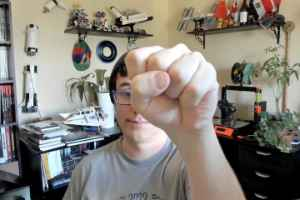

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread("photo.jpg")
cv2_imshow(img)

In [76]:
# Imports neccessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# Create a GestureRecognizer object.
model_path = os.path.abspath("rock_paper_scissors.task")
recognizer = vision.GestureRecognizer.create_from_model_path(model_path)

# Load the input image.
image = mp.Image.create_from_file('media-libraryWEMBQt.jpeg')

# Run gesture recognition.
recognition_result = recognizer.recognize(image)

# Display the most likely gesture.
top_gesture = recognition_result.gestures[0][0]
print(f"Gesture recognized: {top_gesture.category_name} ({top_gesture.score})")

Gesture recognized: 33 (0.9943392872810364)


I0000 00:00:1701680759.981811       1 gl_context.cc:344] GL version: 2.1 (2.1 ATI-5.1.35), renderer: AMD Radeon Pro 555X OpenGL Engine
W0000 00:00:1701680759.983758       1 gesture_recognizer_graph.cc:129] Hand Gesture Recognizer contains CPU only ops. Sets HandGestureRecognizerGraph acceleration to Xnnpack.
